Scikit-Learn Linear Regression Predictions:
[5.   5.05 5.2  5.3  5.4 ]
TensorFlow version: 2.18.0


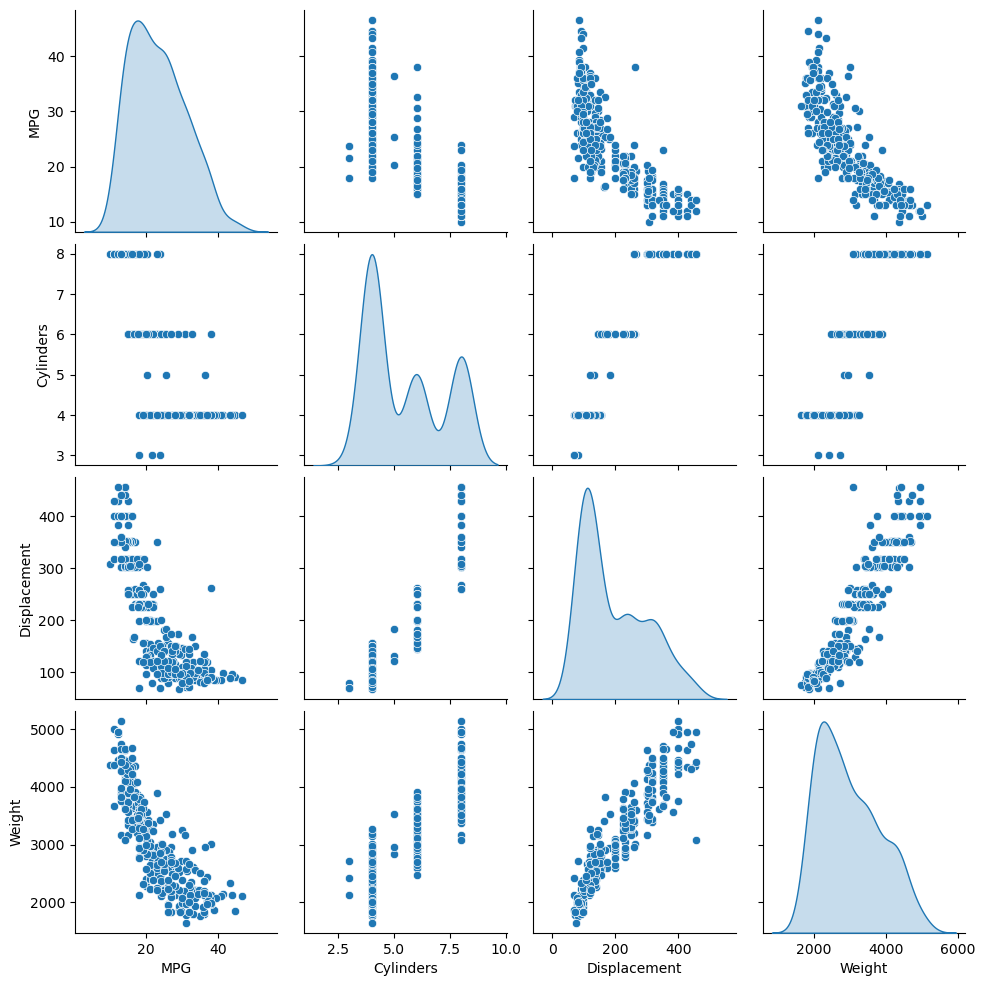

Normalization mean: [[5.4777069e+00 1.9531847e+02 1.0486943e+02 2.9902517e+03 1.5559236e+01
  7.5898087e+01 1.7834395e-01 1.9745223e-01 6.2420380e-01]]
First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]
Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


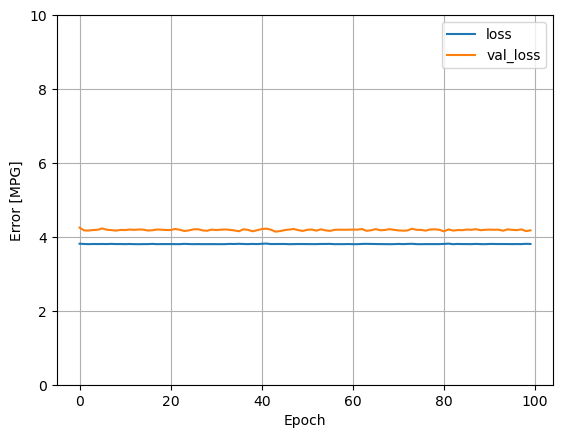

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


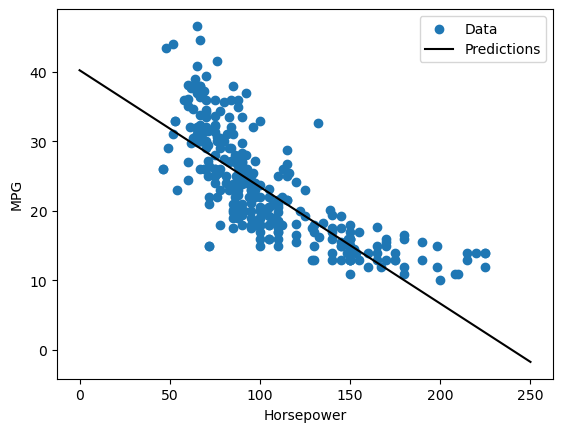

In [5]:
# Simple Linear Regression using Scikit-Learn
import numpy as np
from sklearn.linear_model import LinearRegression

# Data
x = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 2.5, 3, 3.5, 4])

# Model
model = LinearRegression()
model.fit(x, y)

# Predictions
prediction = model.predict([[7], [7.1], [7.4], [7.6], [7.8]])
print("Scikit-Learn Linear Regression Predictions:")
print(prediction)

# Regression in Keras
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers

print("TensorFlow version:", tf.__version__)

# Load dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)
dataset = raw_dataset.copy()

# Drop missing values
dataset = dataset.dropna()

# One-hot encode 'Origin' column
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

# Split data into training and test sets
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

# Inspect data
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')
plt.show()

# Split features from labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

# Normalization
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features, dtype=np.float32))
print("Normalization mean:", normalizer.mean.numpy())

# Example normalization
first = np.array(train_features[:1], dtype=np.float32)
with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print('Normalized:', normalizer(first).numpy())



# Compile model
horsepower_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

# Train model
history = horsepower_model.fit(train_features['Horsepower'], train_labels, epochs=100, verbose=0, validation_split=0.2)

# Plot training loss
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

plot_loss(history)
plt.show()

# Evaluate model
test_results = {}
test_results['horsepower_model'] = horsepower_model.evaluate(test_features['Horsepower'], test_labels, verbose=0)

# Make predictions
x = tf.linspace(0.0, 250.0, 251)
y = horsepower_model.predict(x)

# Plot predictions
def plot_horsepower(x, y):
    plt.scatter(train_features['Horsepower'], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.legend()

plot_horsepower(x, y)
plt.show()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization)      │ (314, 9)                    │              19 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19 (80.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 19 (80.00 B)

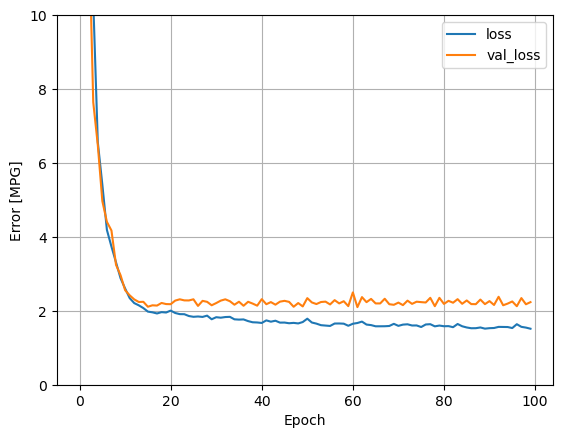

Test Mean Absolute Error: 1.72 MPG
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


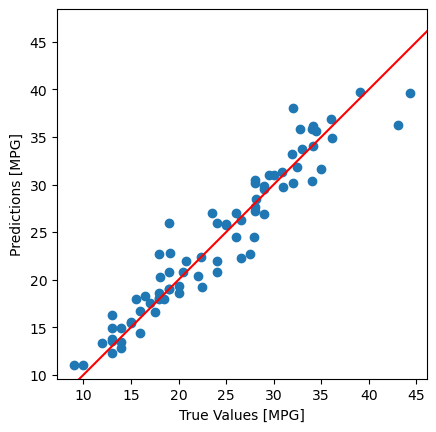

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

# Load dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)
dataset = raw_dataset.copy()

# Drop missing values
dataset = dataset.dropna()

# One-hot encode 'Origin' column
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

# Split data into training and test sets
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

# Split features from labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

# Normalize features
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

# Build the multivariate regression model
multivariate_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=64, activation='relu'),  # Hidden layer with 64 units
    layers.Dense(units=1)                      # Output layer
])

# Model summary
multivariate_model.summary()

# Compile the model
multivariate_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error'
)

# Train the model
history = multivariate_model.fit(
    train_features, train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

# Plot training loss
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

plot_loss(history)
plt.show()

# Evaluate the model
test_results = multivariate_model.evaluate(test_features, test_labels, verbose=0)
print(f"Test Mean Absolute Error: {test_results:.2f} MPG")

# Make predictions
test_predictions = multivariate_model.predict(test_features).flatten()

# Plot predictions vs true values
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.plot([-100, 100], [-100, 100], color='red')
plt.show()


In [ ]:
Define Vectors: tf.constant is used to create constant tensors (vectors in this case).

Element-wise Operations: TensorFlow provides built-in functions like tf.add, tf.subtract, tf.multiply, and tf.divide for vector operations.
Convert Tensor to NumPy: .numpy() converts the TensorFlow tensor to a NumPy array for easier reading in the output.
Output Results: Print the vectors and the results of operations.


Scikit-Learn Linear Regression:

Used to illustrate a simple linear regression example.
It fits a regression line to a given dataset and makes predictions.

Keras Regression Model:

Built using TensorFlow's Keras API.
Uses the UCI Auto MPG dataset for predicting MPG (Miles Per Gallon) based on car features.
Key Steps in the Keras Implementation:
Dataset Loading and Preprocessing:

The UCI Auto MPG dataset is loaded and cleaned (missing values are dropped).
The Origin column is one-hot encoded for categorical representation.
Data is split into training and test sets.
Feature Normalization:

TensorFlows Normalization layer is used to scale features for efficient training.
The normalization layer is adapted to the training data.
Linear Regression Model:

A simple linear regression model predicts MPG based on a single feature (Horsepower).
The model consists of a normalization layer and a single dense unit.
Model Compilation and Training:

Compiled using the Adam optimizer with mean_absolute_error as the loss function.
Trained for 100 epochs with validation split for monitoring overfitting.
Evaluation and Prediction:

The model is evaluated on the test dataset.
Predictions are made for a range of Horsepower values.
Visualization:

Training and validation loss are plotted to assess model performance during training.
Scatter plots show actual vs. predicted values.